<a href="https://colab.research.google.com/github/PabloAndree/Python_PA/blob/main/%5BStudentView%5D_Lab_2_Scrapping_HTML_Websites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 2: Construyendo HTML Scrapers**

El objetivo de este laboratorio es presentar la mecánica básica de ***Web Scraping***:

*   Cómo usar Python para solicitar información de un servidor web
*   Cómo realizar el manejo básico de la respuesta del servidor
*   Cómo comenzar a interactuar con un sitio web de manera automatizada.

**Recordemos** que los pasos para hacer Web Scraping son:

1.   Inspeccionar la página
2.   Descargar el contenido de la página
3.   Parsear HTML

## **Paso 1:** Inspeccionar la página

Para este laboratorio vamos a utilizar la siguiente [página](https://realpython.github.io/fake-jobs/)

Realice las tres acciones a considerar descritos en la clase:
*   Explora la página web
*   Descifra la información de la URL
*   Inspecciona el código de la página web usando el navegador

## **Paso 2:** Descargar el contenido de la página web

Para este paso utilizaremos lo aprendido en las sesiones anteriores con la librería `requests`

In [1]:
#Cargamos la librería
import requests

In [3]:
#Definimos la url para hacer scraping
url = "https://realpython.github.io/fake-jobs/"

In [4]:
#Descargamos el contenido del url
page = requests.get(url)
page

<Response [200]>

In [5]:
page.content

b'<!DOCTYPE html>\n<html>\n  <head>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n    <title>Fake Python</title>\n    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css">\n  </head>\n  <body>\n  <section class="section">\n    <div class="container mb-5">\n      <h1 class="title is-1">\n        Fake Python\n      </h1>\n      <p class="subtitle is-3">\n        Fake Jobs for Your Web Scraping Journey\n      </p>\n    </div>\n    <div class="container">\n    <div id="ResultsContainer" class="columns is-multiline">\n    <div class="column is-half">\n<div class="card">\n  <div class="card-content">\n    <div class="media">\n      <div class="media-left">\n        <figure class="image is-48x48">\n          <img src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1" alt="Real Python Logo">\n        </figure>\n      </div>\n      <div class="media-content

## **Paso 3**: Parsear HTML

Para este paso utilizaremos la librería **BeautifulSoup** que ayuda a formatear y organizar la web y presentarnos objetos de Python fácilmente transitables que representan estructuras XML.

In [6]:
#Cargamos la librería
from bs4 import BeautifulSoup

Utilizaremos la librería para crear un objeto de `Beautiful Soup` a partir del contenido de la website y el tipo del parser que se usará para crear el objeto. Como resultado el objeto `Beautiful Soup` tiene la siguiente estructura:

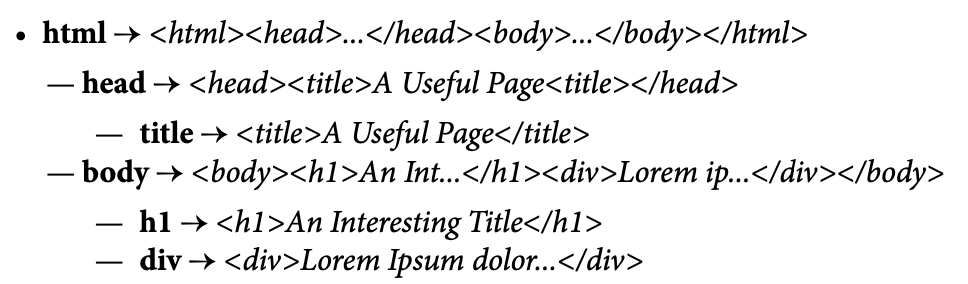

In [ ]:
page.content

In [7]:
#Crear la sopa
soup = BeautifulSoup(page.content, 'html.parser')
soup

<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Fake Python</title>
<link href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css" rel="stylesheet"/>
</head>
<body>
<section class="section">
<div class="container mb-5">
<h1 class="title is-1">
        Fake Python
      </h1>
<p class="subtitle is-3">
        Fake Jobs for Your Web Scraping Journey
      </p>
</div>
<div class="container">
<div class="columns is-multiline" id="ResultsContainer">
<div class="column is-half">
<div class="card">
<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
</figure>
</div>
<div class="media-content">
<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
</div>
</div>

Una vez el objeto es construido uno puede acceder a cualquier parte dentro de la estructura mencionada

In [ ]:
#TO DO
soup.head

<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Fake Python</title>
<link href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css" rel="stylesheet"/>
</head>

In [ ]:
soup.body

<body>
<section class="section">
<div class="container mb-5">
<h1 class="title is-1">
        Fake Python
      </h1>
<p class="subtitle is-3">
        Fake Jobs for Your Web Scraping Journey
      </p>
</div>
<div class="container">
<div class="columns is-multiline" id="ResultsContainer">
<div class="column is-half">
<div class="card">
<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
</figure>
</div>
<div class="media-content">
<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
</div>
</div>
<div class="content">
<p class="location">
        Stewartbury, AA
      </p>
<p class="is-small has-text-grey">
<time datetime="2021-04-08">2021-04-08</time>
</p>
</div>
<footer class="card-footer">
<a class="card-footer-item" href="https://www.real

In [ ]:
soup.h1

<h1 class="title is-1">
        Fake Python
      </h1>

### **Funciones `find()` y `find_all()`**

Son las funciones más usadas en BeautifulSoup. Gracias a ellas, es fácil filtrar y encontrar tags deseados. Ambas como se observa a continuación son bien similares:

`find_all(tag, attributes, recursive, text, limit, keywords)`

`find(tag, attributes, recursive, text, keywords)`

Revisemos cada uno de los argumentos:

**Tag:** Recibe un tag o una lista de tags

In [ ]:
#TO DO (lista o total)
soup.find_all('h1')

[<h1 class="title is-1">
         Fake Python
       </h1>]

In [ ]:
#TO DO (primero que encuentre)
soup.find('h1')

<h1 class="title is-1">
        Fake Python
      </h1>

In [ ]:
soup.find_all(['h2','h3'])

[<h2 class="title is-5">Senior Python Developer</h2>,
 <h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>,
 <h2 class="title is-5">Energy engineer</h2>,
 <h3 class="subtitle is-6 company">Vasquez-Davidson</h3>,
 <h2 class="title is-5">Legal executive</h2>,
 <h3 class="subtitle is-6 company">Jackson, Chambers and Levy</h3>,
 <h2 class="title is-5">Fitness centre manager</h2>,
 <h3 class="subtitle is-6 company">Savage-Bradley</h3>,
 <h2 class="title is-5">Product manager</h2>,
 <h3 class="subtitle is-6 company">Ramirez Inc</h3>,
 <h2 class="title is-5">Medical technical officer</h2>,
 <h3 class="subtitle is-6 company">Rogers-Yates</h3>,
 <h2 class="title is-5">Physiological scientist</h2>,
 <h3 class="subtitle is-6 company">Kramer-Klein</h3>,
 <h2 class="title is-5">Textile designer</h2>,
 <h3 class="subtitle is-6 company">Meyers-Johnson</h3>,
 <h2 class="title is-5">Television floor manager</h2>,
 <h3 class="subtitle is-6 company">Hughes-Williams</h3>,
 <h2 class="title is-

**Attributes:** Recibe un diccionario de atributos de Python y los empareja con los tags que contiene alguno de esos atributos.

In [ ]:
#TO DO
results =soup.find_all('div',{'class':{'card','card-content'}})
len(results)

200

**Recursive:** es un argumento booleano.

Si es `True`, la función `find_all` buscará también en los descendientes para buscar tags que coincidan con los parámetros.

Si es `False`, solo buscará en los tags que se encuentren en top-level.

By default, `find_all` trabaja recursivamente.

**Text:** Es un argumento inusual que busca tags en base al contenido textual de los tags en vez de las propiedades de los tags.

**Limit:** es un argumento usado solo para la función `find_all`. Retorna las primeras $x$ items de una página.

La función `find` es equivalente a la función `find_all` con límite igual 1.

**Keyword:** Este argumento nos permite seleccionar tags que contienen un atributo particular o un conjunto de atributos.

### **Ejemplo 1**:
Encontrar los elementos HTML por sus Ids

`<div id="ResultsContainer">`

  `<!-- all the job listings -->`

`</div>`


In [8]:
#TO DO
results1 = soup.find(id='ResultsContainer')
results1

<div class="columns is-multiline" id="ResultsContainer">
<div class="column is-half">
<div class="card">
<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
</figure>
</div>
<div class="media-content">
<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
</div>
</div>
<div class="content">
<p class="location">
        Stewartbury, AA
      </p>
<p class="is-small has-text-grey">
<time datetime="2021-04-08">2021-04-08</time>
</p>
</div>
<footer class="card-footer">
<a class="card-footer-item" href="https://www.realpython.com" target="_blank">Learn</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html" target="_blank">Apply</a>
</footer>
</div>
</div>
</div>
<div class="column is-half">


La función `prettify()` imprime los resultados de manera más compacta

In [9]:
#TO DO
results1.prettify()

'<div class="columns is-multiline" id="ResultsContainer">\n <div class="column is-half">\n  <div class="card">\n   <div class="card-content">\n    <div class="media">\n     <div class="media-left">\n      <figure class="image is-48x48">\n       <img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>\n      </figure>\n     </div>\n     <div class="media-content">\n      <h2 class="title is-5">\n       Senior Python Developer\n      </h2>\n      <h3 class="subtitle is-6 company">\n       Payne, Roberts and Davis\n      </h3>\n     </div>\n    </div>\n    <div class="content">\n     <p class="location">\n      Stewartbury, AA\n     </p>\n     <p class="is-small has-text-grey">\n      <time datetime="2021-04-08">\n       2021-04-08\n      </time>\n     </p>\n    </div>\n    <footer class="card-footer">\n     <a class="card-footer-item" href="https://www.realpython.com" target="_blank">\n      Learn\n     </a>\n    

### **Ejemplo 2:**

A partir de los resultados del ejemplo anterior podemos encontrar los elementos de interés dentro de estos resultados.

In [10]:
#TO DO
job_cards = results1.find_all('div',class_='card-content')
job_cards

[<div class="card-content">
 <div class="media">
 <div class="media-left">
 <figure class="image is-48x48">
 <img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
 </figure>
 </div>
 <div class="media-content">
 <h2 class="title is-5">Senior Python Developer</h2>
 <h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
 </div>
 </div>
 <div class="content">
 <p class="location">
         Stewartbury, AA
       </p>
 <p class="is-small has-text-grey">
 <time datetime="2021-04-08">2021-04-08</time>
 </p>
 </div>
 <footer class="card-footer">
 <a class="card-footer-item" href="https://www.realpython.com" target="_blank">Learn</a>
 <a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html" target="_blank">Apply</a>
 </footer>
 </div>,
 <div class="card-content">
 <div class="media">
 <div class="media-left">
 <figure class="image is-48x48">
 <img alt="Rea

Podemos ordenar visualmente mejor los resultados

In [11]:
#TO DO
for job in job_cards:
  print(job, end='\n*2')

<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
</figure>
</div>
<div class="media-content">
<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
</div>
</div>
<div class="content">
<p class="location">
        Stewartbury, AA
      </p>
<p class="is-small has-text-grey">
<time datetime="2021-04-08">2021-04-08</time>
</p>
</div>
<footer class="card-footer">
<a class="card-footer-item" href="https://www.realpython.com" target="_blank">Learn</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html" target="_blank">Apply</a>
</footer>
</div>
*2<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://f

Sin embargo aún es muy grande podemos encontrar tags dentro de cada job_element y de esa manera encontrar la data que sí nos interesa

In [23]:
#TO DO
for job in job_cards:

  jobtitle = job.find("h2", class_="title").text.strip()

  company = job.find("h3", class_="company").text.strip()

  location = job.find("p", class_="location").text.strip()

  link = job.find("a", class_="card-footer-item")["href"]

  print(jobtitle, company, location, link)

Senior Python Developer Payne, Roberts and Davis Stewartbury, AA https://www.realpython.com
Energy engineer Vasquez-Davidson Christopherville, AA https://www.realpython.com
Legal executive Jackson, Chambers and Levy Port Ericaburgh, AA https://www.realpython.com
Fitness centre manager Savage-Bradley East Seanview, AP https://www.realpython.com
Product manager Ramirez Inc North Jamieview, AP https://www.realpython.com
Medical technical officer Rogers-Yates Davidville, AP https://www.realpython.com
Physiological scientist Kramer-Klein South Christopher, AE https://www.realpython.com
Textile designer Meyers-Johnson Port Jonathan, AE https://www.realpython.com
Television floor manager Hughes-Williams Osbornetown, AE https://www.realpython.com
Waste management officer Jones, Williams and Villa Scotttown, AP https://www.realpython.com
Software Engineer (Python) Garcia PLC Ericberg, AE https://www.realpython.com
Interpreter Gregory and Sons Ramireztown, AE https://www.realpython.com
Architect

### **Ejemplo 3:**

Extracción solo del texto de cada puesto laboral (*job posting*).

In [13]:
#TO DO
jobs=[]

for job in job_cards:

  jobdic = {}
  jobdic["jobtitle"] = job.find("h2", class_="title").text.strip()
  jobdic["company"] = job.find("h3", class_="company").text.strip()
  jobdic["location"] = job.find("p", class_="location").text.strip()
  jobs.append(jobdic)
jobs

[{'jobtitle': 'Senior Python Developer',
  'company': 'Payne, Roberts and Davis',
  'location': 'Stewartbury, AA'},
 {'jobtitle': 'Energy engineer',
  'company': 'Vasquez-Davidson',
  'location': 'Christopherville, AA'},
 {'jobtitle': 'Legal executive',
  'company': 'Jackson, Chambers and Levy',
  'location': 'Port Ericaburgh, AA'},
 {'jobtitle': 'Fitness centre manager',
  'company': 'Savage-Bradley',
  'location': 'East Seanview, AP'},
 {'jobtitle': 'Product manager',
  'company': 'Ramirez Inc',
  'location': 'North Jamieview, AP'},
 {'jobtitle': 'Medical technical officer',
  'company': 'Rogers-Yates',
  'location': 'Davidville, AP'},
 {'jobtitle': 'Physiological scientist',
  'company': 'Kramer-Klein',
  'location': 'South Christopher, AE'},
 {'jobtitle': 'Textile designer',
  'company': 'Meyers-Johnson',
  'location': 'Port Jonathan, AE'},
 {'jobtitle': 'Television floor manager',
  'company': 'Hughes-Williams',
  'location': 'Osbornetown, AE'},
 {'jobtitle': 'Waste management off

In [14]:
import pandas as pd

In [15]:
df = pd.DataFrame(jobs)
df

,jobtitle,company,location
0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA"
1,Energy engineer,Vasquez-Davidson,"Christopherville, AA"
2,Legal executive,"Jackson, Chambers and Levy","Port Ericaburgh, AA"
3,Fitness centre manager,Savage-Bradley,"East Seanview, AP"
4,Product manager,Ramirez Inc,"North Jamieview, AP"
...,...,...,...
95,Museum/gallery exhibitions officer,"Nguyen, Yoder and Petty","Lake Abigail, AE"
96,"Radiographer, diagnostic",Holder LLC,"Jacobshire, AP"
97,Database administrator,Yates-Ferguson,"Port Susan, AE"
98,Furniture designer,Ortega-Lawrence,"North Tiffany, AA"


Para quitar los espacios en blanco usamos funciones para strings (`.strip()`).

In [ ]:
#TO DO

### **Ejemplo 4:**
Filtrar los puestos de trabajo (job postings) en base a un *keyword*.

Nota: La búsqueda es del string exacto.

In [17]:
#TO DO
python_jobs = results1.find_all('h2', string='Legal executive')
python_jobs

[<h2 class="title is-5">Legal executive</h2>,
 <h2 class="title is-5">Legal executive</h2>]